In [35]:
# Muhammad Fauzan Nur'ilham
# 1103204085
# Machine Learning
# TK-44-G4

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive

import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Ganti 'nama_file.csv' dengan nama file CSV Anda
file_path = ('/content/drive/MyDrive/Machine Learning/Dataset/cleaned_tayara_cars2.0.csv')

df=pd.read_csv(file_path)

In [39]:
# Menampilkan jumlah merek mobil yang unik dalam kolom "brand"
print("nb of brands "+str(df["brand"].nunique()))

# Menampilkan jumlah jenis bahan bakar yang unik dalam kolom "Fuel_Type"
print("nb of fuel types "+str(df["Fuel_Type"].nunique()))

# Menampilkan jumlah kota yang unik dalam kolom "city"
print("nb of cities "+str(df["city"].nunique()))

# Menampilkan jumlah model mobil yang unik dalam kolom "model"
print("nb of car models "+str(df["model"].nunique()))

nb of brands 23
nb of fuel types 2
nb of cities 24
nb of car models 400


In [40]:
df.drop(["price"],axis=1,inplace=True)
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.drop(["Kms_Driven"],axis=1,inplace=True)
df.drop(["year"],axis=1,inplace=True)
df.head()

,brand,model,Fuel_Type,Horse_pow,city,nb_year,log_price,log_Kms_Driven
0,Volkswagen,Polo,Diesel,4.0,Ben arous,0,4.096910,0.000000
1,Opel,Astra,Diesel,1.0,Tunis,13,4.332438,5.255273
2,Volkswagen,Polo,Diesel,4.0,Ben arous,0,4.096910,0.000000
3,Opel,Astra,Diesel,1.0,Tunis,13,4.332438,5.255273
4,Volkswagen,Polo,Essence,5.0,Tunis,2,4.653213,4.462398


In [41]:
model_frequency  = df.groupby('model').size()/len(df)
df.loc[:,'model_freq_encode'] = df['model'].map(model_frequency)

df.drop(["model"],axis=1,inplace=True)

df.head()

,brand,Fuel_Type,Horse_pow,city,nb_year,log_price,log_Kms_Driven,model_freq_encode
0,Volkswagen,Diesel,4.0,Ben arous,0,4.096910,0.000000,0.053937
1,Opel,Diesel,1.0,Tunis,13,4.332438,5.255273,0.013065
2,Volkswagen,Diesel,4.0,Ben arous,0,4.096910,0.000000,0.053937
3,Opel,Diesel,1.0,Tunis,13,4.332438,5.255273,0.013065
4,Volkswagen,Essence,5.0,Tunis,2,4.653213,4.462398,0.053937


In [42]:
brand_frequency  = df.groupby('brand').size()/len(df)
df.loc[:,'brand_freq_encode'] = df['brand'].map(brand_frequency)
df.drop(["brand"],axis=1,inplace=True)

df.head()

,Fuel_Type,Horse_pow,city,nb_year,log_price,log_Kms_Driven,model_freq_encode,brand_freq_encode
0,Diesel,4.0,Ben arous,0,4.096910,0.000000,0.053937,0.155460
1,Diesel,1.0,Tunis,13,4.332438,5.255273,0.013065,0.035479
2,Diesel,4.0,Ben arous,0,4.096910,0.000000,0.053937,0.155460
3,Diesel,1.0,Tunis,13,4.332438,5.255273,0.013065,0.035479
4,Essence,5.0,Tunis,2,4.653213,4.462398,0.053937,0.155460


In [43]:
city_frequency  = df.groupby('city').size()/len(df)
df.loc[:,'city_freq_encode'] = df['city'].map(city_frequency)
df.drop(["city"],axis=1,inplace=True)

df.head()

,Fuel_Type,Horse_pow,nb_year,log_price,log_Kms_Driven,model_freq_encode,brand_freq_encode,city_freq_encode
0,Diesel,4.0,0,4.096910,0.000000,0.053937,0.155460,0.101762
1,Diesel,1.0,13,4.332438,5.255273,0.013065,0.035479,0.311998
2,Diesel,4.0,0,4.096910,0.000000,0.053937,0.155460,0.101762
3,Diesel,1.0,13,4.332438,5.255273,0.013065,0.035479,0.311998
4,Essence,5.0,2,4.653213,4.462398,0.053937,0.155460,0.311998


In [44]:
fuel_frequency  = df.groupby('Fuel_Type').size()/len(df)
df.loc[:,'fuel_freq_encode'] = df['Fuel_Type'].map(fuel_frequency)


df.drop(["Fuel_Type"],axis=1,inplace=True)
df.head()

,Horse_pow,nb_year,log_price,log_Kms_Driven,model_freq_encode,brand_freq_encode,city_freq_encode,fuel_freq_encode
0,4.0,0,4.096910,0.000000,0.053937,0.155460,0.101762,0.356826
1,1.0,13,4.332438,5.255273,0.013065,0.035479,0.311998,0.356826
2,4.0,0,4.096910,0.000000,0.053937,0.155460,0.101762,0.356826
3,1.0,13,4.332438,5.255273,0.013065,0.035479,0.311998,0.356826
4,5.0,2,4.653213,4.462398,0.053937,0.155460,0.311998,0.643174


In [45]:
fuel_frequency  = df.groupby('Horse_pow').size()/len(df)
df.loc[:,'horse_freq_encode'] = df['Horse_pow'].map(fuel_frequency)


df.drop(["Horse_pow"],axis=1,inplace=True)
df.head()

,nb_year,log_price,log_Kms_Driven,model_freq_encode,brand_freq_encode,city_freq_encode,fuel_freq_encode,horse_freq_encode
0,0,4.096910,0.000000,0.053937,0.155460,0.101762,0.356826,0.167805
1,13,4.332438,5.255273,0.013065,0.035479,0.311998,0.356826,0.009709
2,0,4.096910,0.000000,0.053937,0.155460,0.101762,0.356826,0.167805
3,13,4.332438,5.255273,0.013065,0.035479,0.311998,0.356826,0.009709
4,2,4.653213,4.462398,0.053937,0.155460,0.311998,0.643174,0.355747


In [46]:
df.columns.tolist()

['nb_year',
 'log_price',
 'log_Kms_Driven',
 'model_freq_encode',
 'brand_freq_encode',
 'city_freq_encode',
 'fuel_freq_encode',
 'horse_freq_encode']

In [47]:
L= list(df.columns.values)
del L[1]

In [48]:
X=df[L]
X

,nb_year,log_Kms_Driven,model_freq_encode,brand_freq_encode,city_freq_encode,fuel_freq_encode,horse_freq_encode
0,0,0.000000,0.053937,0.155460,0.101762,0.356826,0.167805
1,13,5.255273,0.013065,0.035479,0.311998,0.356826,0.009709
2,0,0.000000,0.053937,0.155460,0.101762,0.356826,0.167805
3,13,5.255273,0.013065,0.035479,0.311998,0.356826,0.009709
4,2,4.462398,0.053937,0.155460,0.311998,0.643174,0.355747
...,...,...,...,...,...,...,...
8338,8,4.934498,0.008031,0.150186,0.101762,0.643174,0.355747
8339,12,5.365488,0.024452,0.133046,0.014623,0.643174,0.175716
8340,6,5.004321,0.026369,0.041232,0.065684,0.643174,0.355747
8341,13,5.436163,0.021335,0.155460,0.005394,0.643174,0.132087


In [49]:
y=df[['log_price']]
y

,log_price
0,4.096910
1,4.332438
2,4.096910
3,4.332438
4,4.653213
...,...
8338,4.459392
8339,4.371068
8340,4.574031
8341,4.462398


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [51]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

<ipython-input-51-f66fc4a953da>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
<ipython-input-51-f66fc4a953da>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transform(X_test.astype(np.float))


In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predicting the test set result
y_pred = regressor.predict(X_test)


#evaluate the results
from sklearn import metrics


print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.17163204772937782
MSE: 0.1217790529916744
RMSE: 0.3489685558781398


<ipython-input-53-f7d4a70d285b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: ylabel='Density'>

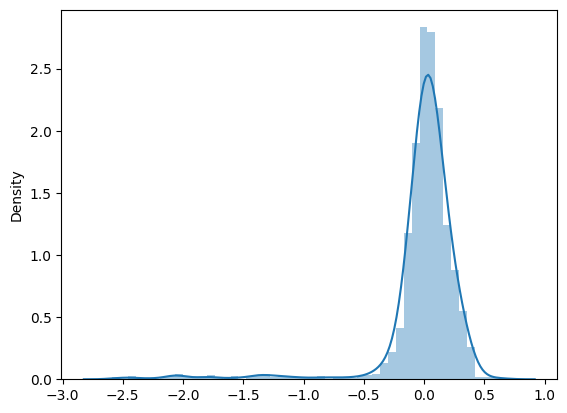

In [53]:
sns.distplot(y_test-y_pred)

In [54]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)
dtr_y_pred=dtr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, dtr_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_y_pred)))

MAE: 0.18075841967995449
MSE: 0.17639561403971585
RMSE: 0.4199947785862532


<ipython-input-55-c3e3af8574c4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-dtr_y_pred)


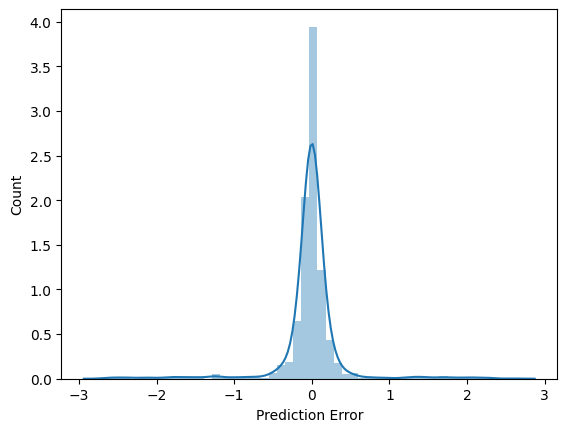

In [55]:
y_test=y_test.to_numpy()
y_test=np.squeeze(y_test)
sns.distplot(y_test-dtr_y_pred)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [56]:
from sklearn.ensemble import RandomForestRegressor
# Gunakan grid acak untuk mencari hiperparameter terbaik
# Pertama, buat model terbaik untuk disesuaikan
rf = RandomForestRegressor()

In [57]:
# jumlah dari tree di random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Jumlah fitur yang dipertimbangkan setiap kali pemisahan
max_features = ['auto', 'sqrt']
# Jumlah maksimum level dalam tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Jumlah minimum sampel yang diperlukan untuk memisahkan sebuah node
min_samples_split = [2, 5, 10, 15, 100]
# Jumlah minimum sampel yang diperlukan di setiap node daun
min_samples_leaf = [1, 2, 5, 10]

In [58]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [59]:
from sklearn.model_selection import RandomizedSearchCV

# Pencarian acak parameter, dengan validasi silang 3 kali,
# mencari melalui 100 kombinasi yang berbeda
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)


In [60]:
rf_random.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimat

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  12.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   9.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  10.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   8.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  11.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  10.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.2s
[CV] END max_depth=5, max_feat

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  11.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  11.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   9.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  11.3s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [61]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [62]:
predictions = rf_random.predict(X_test)

<ipython-input-64-45e443d15ccc>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - predictions)


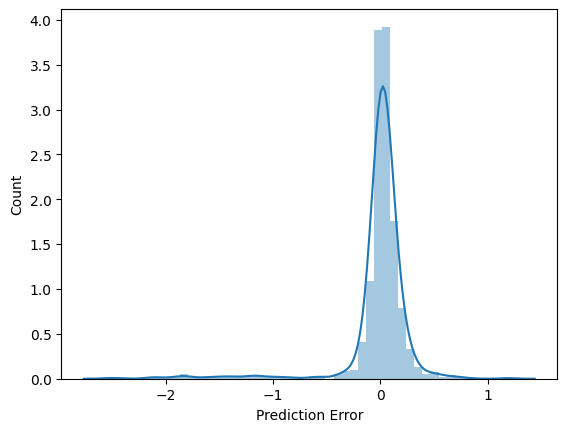

In [64]:
# Menggunakan np.squeeze untuk meratakan array jika perlu
y_test = np.squeeze(y_test)

# Melakukan visualisasi distribusi error prediksi
sns.distplot(y_test - predictions)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
_ = plt.show()

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.140978428462304
MSE: 0.10360682950743141
RMSE: 0.32188014773737045


In [66]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [67]:
net = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                       colsample_bynode=1, colsample_bytree=1, gamma=0,
                       importance_type='gain', learning_rate=0.08, max_delta_step=0,
                       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
                       n_jobs=1, nthread=None, random_state=0,
                       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                       silent=None, subsample=0.75, verbosity=1, objective='reg:squarederror')

In [69]:
from xgboost import XGBRegressor  # Mengimpor modul XGBoost untuk Regresi

# Inisialisasi model XGBoost
net = XGBRegressor()
net.fit(X_train, y_train)  # Melatih model dengan data pelatihan
XGB_y_pred = net.predict(X_test)  # Melakukan prediksi dengan model


In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, XGB_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, XGB_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, XGB_y_pred)))

MAE: 0.16099118267759976
MSE: 0.12303613001089878
RMSE: 0.35076506384031286


<ipython-input-71-c7041120db45>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-XGB_y_pred)


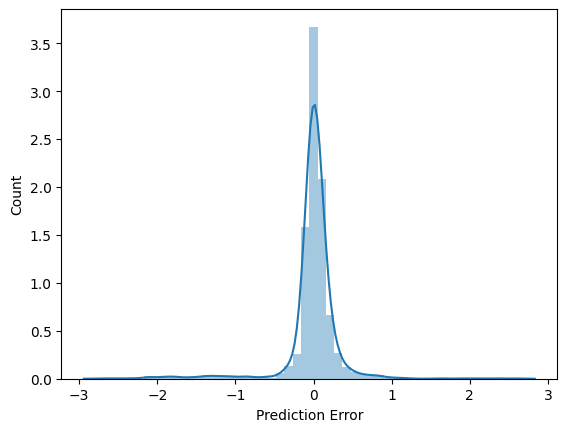

In [71]:
sns.distplot(y_test-XGB_y_pred)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")